<a href="https://colab.research.google.com/github/EddersonPR/challenge-alura-store/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import numpy as np

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()


,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,"164,300.00","6,900.00",16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.61,-74.08
1,Mesa de comedor,Muebles,"192,300.00","8,400.00",18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25,-75.56
2,Juego de mesa,Juguetes,"209,600.00","15,900.00",15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.40,-75.51
3,Microondas,Electrodomésticos,"757,500.00","41,000.00",03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.44,-76.52
4,Silla de oficina,Muebles,"335,200.00","20,200.00",07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25,-75.56


In [ ]:
# Crear nueva columna Tienda en todos los dataframe
for n, df_tienda in enumerate([tienda, tienda2, tienda3, tienda4], start=1):
    df_tienda["Tienda"] = f"T{n}"

In [ ]:
# Validación de columnas
for i, t in enumerate([tienda, tienda2, tienda3, tienda4], start=1):
    print(f"Tienda {i} columnas:", list(t.columns))

Tienda 1 columnas: ['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío', 'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación', 'Método de pago', 'Cantidad de cuotas', 'lat', 'lon', 'Tienda']
Tienda 2 columnas: ['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío', 'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación', 'Método de pago', 'Cantidad de cuotas', 'lat', 'lon', 'Tienda']
Tienda 3 columnas: ['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío', 'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación', 'Método de pago', 'Cantidad de cuotas', 'lat', 'lon', 'Tienda']
Tienda 4 columnas: ['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío', 'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación', 'Método de pago', 'Cantidad de cuotas', 'lat', 'lon', 'Tienda']


In [ ]:
# Unir dataframe para manejo de data
df = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index = True )
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9435 entries, 0 to 9434
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                9435 non-null   object 
 1   Categoría del Producto  9435 non-null   object 
 2   Precio                  9435 non-null   float64
 3   Costo de envío          9435 non-null   float64
 4   Fecha de Compra         9435 non-null   object 
 5   Vendedor                9435 non-null   object 
 6   Lugar de Compra         9435 non-null   object 
 7   Calificación            9435 non-null   int64  
 8   Método de pago          9435 non-null   object 
 9   Cantidad de cuotas      9435 non-null   int64  
 10  lat                     9435 non-null   float64
 11  lon                     9435 non-null   float64
 12  Tienda                  9435 non-null   object 
dtypes: float64(4), int64(2), object(7)
memory usage: 958.4+ KB


In [ ]:
# Validación del tipado - col: Fecha de compra esta como object o string
df.dtypes

,0
Producto,object
Categoría del Producto,object
Precio,float64
Costo de envío,float64
Fecha de Compra,object
Vendedor,object
Lugar de Compra,object
Calificación,int64
Método de pago,object
Cantidad de cuotas,int64


In [ ]:
# Conteo de validación de dataframe
df['Tienda'].value_counts()

,count
Tienda,
T1,2359
T2,2359
T3,2359
T4,2358


In [ ]:
# Modificación del tipado de la columna "Fecha de compra"
df['Fecha de Compra'] = pd.to_datetime(df['Fecha de Compra'], errors='coerce')
df.head()

/tmp/ipython-input-1524029819.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Fecha de Compra'] = pd.to_datetime(df['Fecha de Compra'], errors='coerce')


,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,Tienda
0,Asistente virtual,Electrónicos,"164,300.00","6,900.00",2021-01-16,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.61,-74.08,T1
1,Mesa de comedor,Muebles,"192,300.00","8,400.00",2022-05-18,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25,-75.56,T1
2,Juego de mesa,Juguetes,"209,600.00","15,900.00",2021-03-15,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.40,-75.51,T1
3,Microondas,Electrodomésticos,"757,500.00","41,000.00",2022-05-03,Juan Fernandez,Cali,4,Nequi,1,3.44,-76.52,T1
4,Silla de oficina,Muebles,"335,200.00","20,200.00",2020-11-07,Maria Alfonso,Medellín,5,Nequi,1,6.25,-75.56,T1


#1. Análisis de facturación



## Ingreso total por cada tienda

In [ ]:
# Cálcular el ingreso total por cada tienda
df_ingresos =df.groupby('Tienda')[['Precio']].sum().sort_values('Precio')
pd.options.display.float_format = '{:,.2f}'.format
display(df_ingresos)

,Precio
Tienda,
T4,"1,038,375,700.00"
T3,"1,098,019,600.00"
T2,"1,116,343,500.00"
T1,"1,150,880,400.00"


# 2. Ventas por categoría

In [ ]:
df_categoria = (
    df.groupby(['Tienda', 'Categoría del Producto'])
      .size()
      .reset_index(name='Cantidad')
      .sort_values(['Tienda', 'Cantidad'], ascending=[True, False])
)

df_categoria

,Tienda,Categoría del Producto,Cantidad
7,T1,Muebles,465
3,T1,Electrónicos,448
5,T1,Juguetes,324
2,T1,Electrodomésticos,312
1,T1,Deportes y diversión,284
4,T1,Instrumentos musicales,182
6,T1,Libros,173
0,T1,Artículos para el hogar,171
15,T2,Muebles,442
11,T2,Electrónicos,422


In [ ]:
top3_categorias = df_categoria.groupby('Tienda').head(3)
display(top3_categorias)

,Tienda,Categoría del Producto,Cantidad
7,T1,Muebles,465
3,T1,Electrónicos,448
5,T1,Juguetes,324
15,T2,Muebles,442
11,T2,Electrónicos,422
13,T2,Juguetes,313
23,T3,Muebles,499
19,T3,Electrónicos,451
21,T3,Juguetes,315
31,T4,Muebles,480


# 3. Calificación promedio de la tienda


In [ ]:
df_promedio = df.groupby('Tienda')['Calificación'].mean().reset_index(name='Promedio Calificación')
df_promedio

,Tienda,Promedio Calificación
0,T1,3.98
1,T2,4.04
2,T3,4.05
3,T4,4.00


# 4. Productos más y menos vendidos

In [ ]:
df_producto = (
    df.groupby(['Tienda', 'Producto'])
      .size()
      .reset_index(name='Cantidad')
      .sort_values(['Tienda', 'Cantidad'], ascending=[True, False])
)
df_producto


,Tienda,Producto,Cantidad
1,T1,Armario,60
33,T1,Microondas,60
48,T1,TV LED UHD 4K,60
40,T1,Secadora de ropa,58
9,T1,Bloques de construcción,56
...,...,...,...
181,T4,Lavadora de ropa,38
192,T4,Refrigerador,38
174,T4,Guitarra acústica,37
154,T4,Armario,34


In [ ]:
# Más vendidos (por tienda)
top_productos = df_producto.groupby('Tienda').head(1)
top_productos

,Tienda,Producto,Cantidad
1,T1,Armario,60
75,T2,Iniciando en programación,65
129,T3,Kit de bancas,57
163,T4,Cama box,62


In [ ]:
# Menos vendidos (por tienda)
bottom_productos = df_producto.groupby('Tienda').tail(1)
bottom_productos

,Tienda,Producto,Cantidad
13,T1,Celular ABXY,33
77,T2,Juego de mesa,32
111,T3,Bloques de construcción,35
175,T4,Guitarra eléctrica,33


# 5. Envío promedio por tienda

> Agregar bloque entrecomillado



In [ ]:
df_envio = df.groupby(['Tienda'])['Costo de envío'].mean().reset_index(name="Promedio Envío")
df_envio

,Tienda,Promedio Envío
0,T1,"26,018.61"
1,T2,"25,216.24"
2,T3,"24,805.68"
3,T4,"23,459.46"


# 6. Análisis del desempeño geográfico

## Gráfico de dispersión con Matplotlib

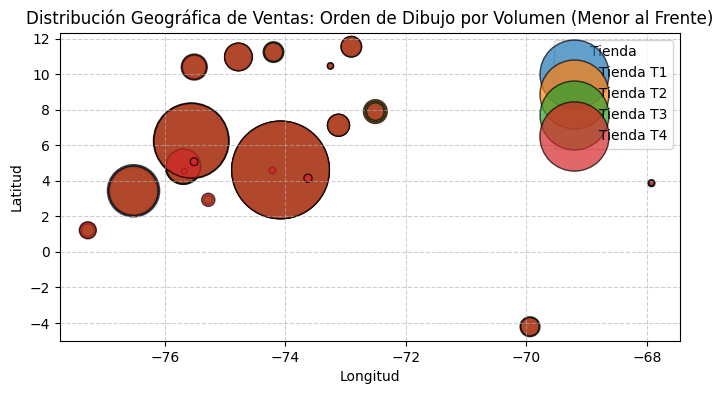

In [ ]:
# --- PREPARACIÓN DE DATOS ---
# 1. Agrupar por Coordenadas y Tienda para contar las ventas en cada punto
df_heatmap = df.groupby(['lon', 'lat', 'Tienda']).size().reset_index(name='Conteo')

# 2. Calcular el total de ventas por tienda para establecer el orden de dibujo
tienda_totales = df_heatmap.groupby('Tienda')['Conteo'].sum()
# Ordenar: La tienda con más ventas se dibuja primero (fondo), la de menos ventas se dibuja al final (frente)
tiendas_ordenadas = tienda_totales.sort_values(ascending=False).index.tolist()

# --- VISUALIZACIÓN ---
plt.figure(figsize=(8, 4))

# 3. Iterar sobre las tiendas en el orden deseado
for tienda in tiendas_ordenadas:
    data = df_heatmap[df_heatmap['Tienda'] == tienda]

    plt.scatter(
        data['lon'],
        data['lat'],
        s=data['Conteo'] * 5,
        label=f'Tienda {tienda}',
        alpha=0.7,
        edgecolors='k',
        linewidths=1
    )

plt.title('Distribución Geográfica de Ventas: Orden de Dibujo por Volumen (Menor al Frente)')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.legend(title='Tienda', loc='upper right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [ ]:
# Definición de regiones (basado en el patrón geográfico)
clases = {
    'Central': ((-76, -73), (3, 8)),
    'Norte': ((-76, -73), (9, 12)),
    'Sur': ((-71, -69), (-5, 0))
}

# 1. Función para clasificar cada fila en una región
def clasificar_region(row):
    lon, lat = row['lon'], row['lat']
    for region, ((lon_min, lon_max), (lat_min, lat_max)) in clases.items():
        if lon_min <= lon <= lon_max and lat_min <= lat <= lat_max:
            return region
    return 'Fuera de Clúster'

# 2. Asignar la región a cada venta en el DataFrame
# Se asume que 'df' aún tiene la columna 'Region' de la ejecución anterior, pero la recalculamos por seguridad
df['Region'] = df.apply(clasificar_region, axis=1)

# 3. CONTEO DE INGRESO POR TIENDA Y REGIÓN (USANDO 'Precio')
# En lugar de .size(), usamos .agg() o .sum()
ingreso_region = df.groupby(['Tienda', 'Region'])['Precio'].sum().reset_index(name='Ingreso_Regional')

# 4. CÁLCULO DEL INGRESO TOTAL POR TIENDA
# Sumamos la columna 'Precio' directamente
total_tienda_ingreso = df.groupby('Tienda')['Precio'].sum().rename('Total_Tienda_Ingreso')

# 5. UNIR LOS TOTALES AL DATAFRAME DE INGRESO REGIONAL
ingreso_region = ingreso_region.merge(total_tienda_ingreso.reset_index(), on='Tienda')

# 6. CALCULAR EL PORCENTAJE DE INGRESO POR REGIÓN
ingreso_region['% de Ingreso'] = (ingreso_region['Ingreso_Regional'] / ingreso_region['Total_Tienda_Ingreso']) * 100

# 7. PIVOTAR PARA LA TABLA DE RENDIMIENTO FINAL
tabla_rendimiento_ingreso = ingreso_region.pivot_table(
    index='Tienda',
    columns='Region',
    values='% de Ingreso',
    fill_value=0
).round(1)

print("\n### TABLA DE RENDIMIENTO REGIONAL (% del ingreso total de la tienda) ###")
print(tabla_rendimiento_ingreso)


### TABLA DE RENDIMIENTO REGIONAL (% del ingreso total de la tienda) ###
Region  Central  Fuera de Clúster  Norte  Sur
Tienda                                       
T1        72.50             20.20   6.00 1.30
T2        76.80             16.00   5.80 1.40
T3        75.30             15.10   7.90 1.70
T4        73.90             17.40   7.10 1.60


In [ ]:

# El DataFrame df debe estar disponible y contener las columnas 'Tienda', 'Region', 'Categoría del Producto', y 'Precio'

# 1. SUMA de INGRESOS por TIENDA, REGIÓN y CATEGORÍA
ingreso_cat_region = df.groupby(['Tienda', 'Region', 'Categoría del Producto'])['Precio'].sum().reset_index(name='Ingreso_Categoria')

# 2. CÁLCULO del INGRESO TOTAL por TIENDA (ya lo tenemos, pero lo recalculamos por claridad)
total_tienda_ingreso = df.groupby('Tienda')['Precio'].sum().rename('Total_Tienda_Ingreso')

# 3. UNIR los totales
ingreso_cat_region = ingreso_cat_region.merge(total_tienda_ingreso.reset_index(), on='Tienda')

# 4. CALCULAR EL PORCENTAJE DEL INGRESO TOTAL DE LA TIENDA
# Esto nos dirá: "¿Qué porcentaje del ingreso TOTAL de T1 viene de la categoría 'X' en la región 'Y'?"
ingreso_cat_region['% del Ingreso Total'] = (ingreso_cat_region['Ingreso_Categoria'] / ingreso_cat_region['Total_Tienda_Ingreso']) * 100
ingreso_cat_region['% del Ingreso Total'] = ingreso_cat_region['% del Ingreso Total'].round(1)

# 5. Filtrar solo los datos relevantes para las conclusiones (Regiones Norte y Sur)
df_analisis = ingreso_cat_region[ingreso_cat_region['Region'].isin(['Norte', 'Sur'])]

print("### % DEL INGRESO TOTAL DE LA TIENDA POR CATEGORÍA EN LAS REGIONES ESTRATÉGICAS (NORTE y SUR) ###")
print(df_analisis.to_string(index=False))

# Opcional: Para una mejor vista de los productos más vendidos en el Norte/Sur:
print("\n--- RESUMEN DE LAS CATEGORÍAS MÁS IMPORTANTES EN EL NORTE ---")
df_norte = df_analisis[df_analisis['Region'] == 'Norte'].sort_values(by=['Tienda', '% del Ingreso Total'], ascending=[True, False])
print(df_norte.head(8).to_string(index=False))

print("\n--- RESUMEN DE LAS CATEGORÍAS MÁS IMPORTANTES EN EL SUR ---")
df_sur = df_analisis[df_analisis['Region'] == 'Sur'].sort_values(by=['Tienda', '% del Ingreso Total'], ascending=[True, False])
print(df_sur.head(8).to_string(index=False))

### % DEL INGRESO TOTAL DE LA TIENDA POR CATEGORÍA EN LAS REGIONES ESTRATÉGICAS (NORTE y SUR) ###
Tienda Region  Categoría del Producto  Ingreso_Categoria  Total_Tienda_Ingreso  % del Ingreso Total
    T1  Norte Artículos para el hogar       1,410,400.00      1,150,880,400.00                 0.10
    T1  Norte    Deportes y diversión       2,010,600.00      1,150,880,400.00                 0.20
    T1  Norte       Electrodomésticos      19,913,900.00      1,150,880,400.00                 1.70
    T1  Norte            Electrónicos      26,648,900.00      1,150,880,400.00                 2.30
    T1  Norte  Instrumentos musicales       4,998,200.00      1,150,880,400.00                 0.40
    T1  Norte                Juguetes       1,103,700.00      1,150,880,400.00                 0.10
    T1  Norte                  Libros         745,400.00      1,150,880,400.00                 0.10
    T1  Norte                 Muebles      12,692,900.00      1,150,880,400.00                 1.10
  

# **INFORME FINAL**